In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import scipy.io
import scipy.signal
from einops import reduce, rearrange
import numpy as np
import matplotlib.pyplot as plt
from npeet import entropy_estimators as ee
from torch.optim.lr_scheduler import StepLR

In [2]:
# Input: Video with shape (32,7680)
# Output: Graph node features with shape (60*32,5) -> 60 graphs with 32 electrodes each with 5 features each
def process_video_de(video):
    # Delta, Theta, Alpha, Beta, Gamma
    bands = [(0,3),(4,7),(8,13),(14,30),(31,50)]
    # Split into windows
    video = video.reshape(-1,32,128)
    node_features = []
    # For each window with shape (32,128) 
    for window in video:
        graph_features = []
        # Get frequency bands and calculate DE for each band -> (32,5)
        for channel in window:
            # Transform to frequency domain
            fft_vals = np.fft.rfft(channel)
            fft_vals = np.abs(fft_vals)
            # Get values for different bands and compute DE
            de_features = [ee.entropy(fft_vals[f:t].reshape(-1,1), k=2) for f,t in bands]
            graph_features.append(de_features)
            
        node_features.append(graph_features)
    node_features = torch.FloatTensor(node_features).reshape(-1,5)
    return node_features

In [68]:
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, ifft
import scipy.signal

In [141]:
# Input: Video with shape (32,7680)
# Output: Graph node features with shape (60*32, 62(?)) -> 60 graphs with 32 electrodes each with 62(?) features each
def process_video_psd(video):
    # Delta, Theta, Alpha, Beta, Gamma
    bands = [(0,4),(4,8),(8,12),(12,30),(30,45)]
    # Split into windows
    print(video.shape)
#     video = video.reshape(-1,32,128)
    samplingFrequency = 128
    for channel in video:
        plt.plot(channel)
        plt.show()
        # Transform to frequency domain
        # Get real amplitudes of FFT (only in positive frequencies) ->rfft=real fast fourier transformation (on real inputs)
        fft_vals = np.fft.rfft(channel)
        # Get frequencies for amplitudes in Hz
        fft_freq = np.fft.rfftfreq(len(channel), 1.0/samplingFrequency)

        plt.plot(fft_freq,fft_vals)
        plt.show()
        
        print(fft_freq.shape,fft_vals.shape)
        
        plt.ylim(-1500,2000)
        
        band_data = []
        for f,t in bands:
            mask = np.logical_or(fft_freq < f, fft_freq > t)
            band = fft_vals.copy()
            band[mask] = 0
            band_data.append(band)
        
        for band in band_data:
            plt.plot(fft_freq,band)
            plt.show()
            
        inverse = [np.fft.irfft(band) for band in band_data]
        
        for i in inverse:
            plt.plot(i)
            plt.show()
            
            
        res = np.array(inverse)
        res = np.sum(res, axis=0)
        
        plt.plot(res)
        plt.show()
#         print(res.shape)
        

        
#         plt.plot(fft_freq,theta)
#         plt.show()
        
        
        
        
#         data_bands = [fft_vals.copy for f,t in bands]
#         for i in range(5):
#             plt.plot(data_bands[i])
#             plt.show()
#         print(data_bands)
#         plt.show()
#         a = np.fft.irfft(fft_vals)
#         print(a.shape)
        
        # Test transform back to time domain actually brigs back original signal
        
        
        
        
        
#         print(scipy.signal.welch(channel))
#         fft_vals = np.fft.rfft(channel)
#         fft_vals = np.abs(fft_vals)
#         plt.plot(fft_vals)
#         plt.show()
        # TODO: DECOMPOSE SIGNAL INTO FREQUENCY BANDS?
#         print(channel)

        
#         
#         plt.show()
    
        raise 'err'
#     node_erfeatures = []
#     # For each window with shape (32,128) 
#     for window in video:
#         graph_features = []
#         # Get frequency bands and calculate DE for each band -> (32,5)
#         for channel in window:
#             plt.plot(channel)
#             plt.show()

            
#             band = fft_vals[0:13]
            
#             plt.plot(fft_vals)
#             plt.show()
            
            
            
#             w = scipy.signal.periodogram(band)
#             print(band.shape)
#             print(w[0].shape,w[1].shape)
            
          
#             # Get values for different bands and compute DE
#             # de_features = [ee.entropy(fft_vals[f:t].reshape(-1,1), k=2) for f,t in bands]
#             psd_features = [scipy.signal.periodogram(fft_vals[f:t].reshape(-1,1)) for f,t in bands]
#             print(psd_features)
#             raise 'err'
#             graph_features.append(psd_features)
            
#         node_features.append(graph_features)
# #         .reshape(-1,5)
#     node_features = torch.FloatTensor(node_features)
    return node_features

s01.mat:   0%|          | 0/32 [00:00<?, ?it/s]

Using global connections
Processing...
tensor([[   0,    0,    0,  ..., 1919, 1919, 1919],
        [   0,    1,    2,  ..., 1909, 1913, 1919]])
torch.Size([32, 7680])


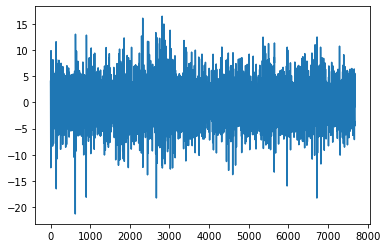

/home/carlos/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


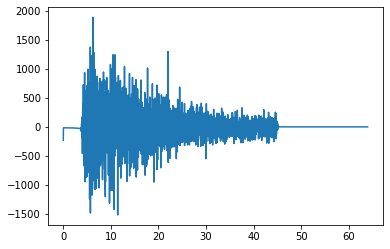

(3841,) (3841,)


/home/carlos/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


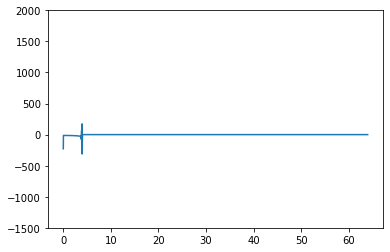

/home/carlos/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


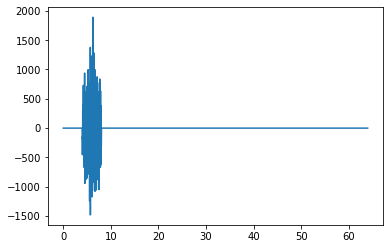

/home/carlos/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


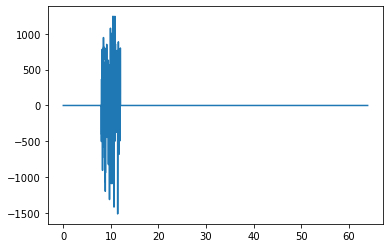

/home/carlos/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


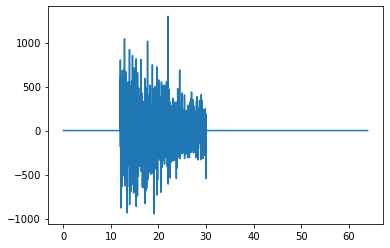

/home/carlos/anaconda3/envs/torch/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


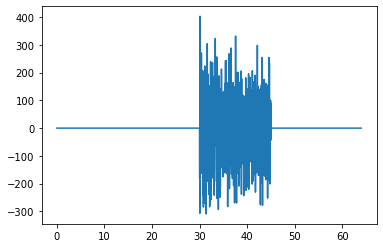

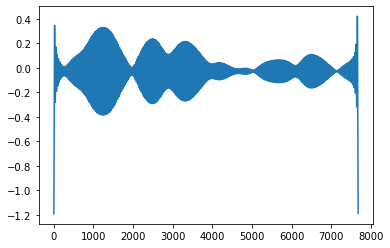

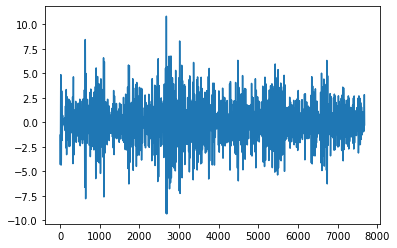

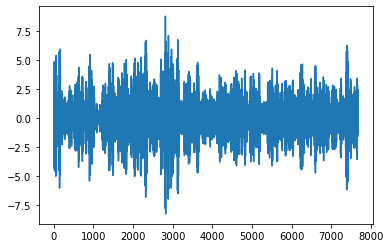

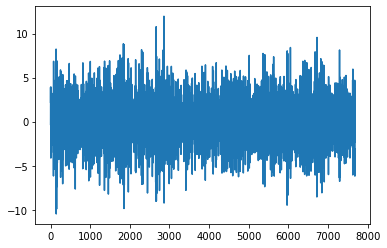

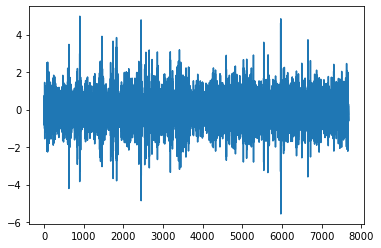

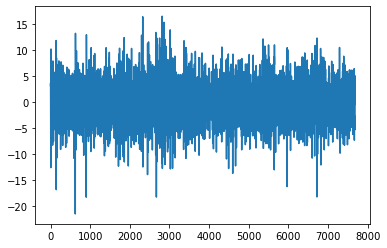

s01.mat:   0%|          | 0/32 [00:01<?, ?it/s]


TypeError: exceptions must derive from BaseException

In [142]:
# Constants used to define data paths
ROOT_DIR = './'
RAW_DIR = 'data/matlabPREPROCESSED'
PROCESSED_DIR = 'data/graphProcessedData'

dataset = DEAPDatasetEEGFeatures(root= ROOT_DIR, raw_dir= RAW_DIR, processed_dir= PROCESSED_DIR)
# Subject-independent classificati
# DEPENDING ON WHAT DATA IS USED THE NETWORK LEARNS BETTER OR WORSE.
# SHOULD WE TRY TO HAVE A BALANCEd TRAINING SET?
dataset = dataset.shuffle()
dataset[0]

In [11]:
from torch_geometric.data import InMemoryDataset, Data, DataLoader
from Electrodes import Electrodes
from tqdm import tqdm
class DEAPDatasetEEGFeatures(InMemoryDataset):
    
  def __init__(self, root, raw_dir,processed_dir, transform=None, pre_transform=None,include_edge_attr = False, undirected_graphs = True, add_global_connections=True, participant_from=1, participant_to=32,window_size=128, n_videos=40):
      self._raw_dir = raw_dir
      self._processed_dir = processed_dir
      self.participant_from = participant_from
      self.participant_to = participant_to
      self.n_videos = n_videos
      self.window_size = window_size
      # Whether or not to include edge_attr in the dataset
      self.include_edge_attr = include_edge_attr
      # If true there will be 1024 links as opposed to 528
      self.undirected_graphs = undirected_graphs
      # Instantiate class to handle electrode positions
      print('Using global connections' if add_global_connections else 'Not using global connections')
      self.electrodes = Electrodes(add_global_connections, expand_3d = False)
      super(DEAPDatasetEEGFeatures, self).__init__(root, transform, pre_transform)
      self.data, self.slices = torch.load(self.processed_paths[0])
      

  @property
  def raw_dir(self):
      return f'{self.root}/{self._raw_dir}'

  @property
  def processed_dir(self):
      return f'{self.root}/{self._processed_dir}'

  @property
  def raw_file_names(self):
      raw_names = [f for f in os.listdir(self.raw_dir)]
      raw_names.sort()
      return raw_names

  @property
  def processed_file_names(self):
      if not os.path.exists(self.processed_dir):
        os.makedirs(self.processed_dir)
      file_name = f'{self.participant_from}-{self.participant_to}' if self.participant_from is not self.participant_to else f'{self.participant_from}'
      return [f'deap_processed_graph.{file_name}.dataset']

  def process(self):
        # Number of nodes per graph
        n_nodes = len(self.electrodes.positions_3d)

        if self.undirected_graphs:
            source_nodes, target_nodes = np.repeat(np.arange(0,n_nodes),n_nodes), np.tile(np.arange(0,n_nodes),n_nodes)
        else:
            source_nodes, target_nodes = np.tril_indices(n_nodes,n_nodes)
        
        edge_attr = self.electrodes.adjacency_matrix[source_nodes,target_nodes]
        
        # Remove zero weight links
        mask = np.ma.masked_not_equal(edge_attr, 0).mask
        edge_attr,source_nodes,target_nodes = edge_attr[mask], source_nodes[mask], target_nodes[mask]

        edge_attr, edge_index = torch.FloatTensor(edge_attr), torch.tensor([source_nodes,target_nodes], dtype=torch.long)
        
        # Expand edge_index and edge_attr to match windows
        e_edge_index = edge_index.clone()
        e_edge_attr = edge_attr.clone()
        for i in range(59):
            a = edge_index + e_edge_index.max() + 1
            e_edge_index = torch.cat([e_edge_index,a],dim=1)
            e_edge_attr = torch.cat([e_edge_attr,edge_attr],dim=0)

        print(e_edge_index)
        # List of graphs that will be written to file
        data_list = []
        pbar = tqdm(range(self.participant_from,self.participant_to+1))
        for participant_id in pbar:
            raw_name = [e for e in self.raw_file_names if str(participant_id).zfill(2) in e][0]
            pbar.set_description(raw_name)
            # Load raw file as np array
            participant_data = scipy.io.loadmat(f'{self.raw_dir}/{raw_name}')
            signal_data = torch.FloatTensor(participant_data['data'][:,:32,128*3:])
            processed = []
            for i, video in enumerate(signal_data[:self.n_videos,:,:]):
                
                # Differential entropy for each band
                # node_features = process_video_de(video)

                # Power spectral density for each channel
                # node_features = scipy.signal.periodogram(video)[1]
                node_features = process_video_psd(video)
                
                raise 'err'
                
                # Raw signals 
                # node_features = video
                
                # Should we add MinMax/Z scaler?
                data = Data(x=torch.FloatTensor(node_features),edge_attr=e_edge_attr,edge_index=e_edge_index, y=torch.FloatTensor([participant_data['labels'][i]])) if self.include_edge_attr else Data(x=torch.FloatTensor(node_features), edge_index=e_edge_index, y=torch.FloatTensor([participant_data['labels'][i]]))
                data_list.append(data) 
               
        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])

In [ ]:
# 880 used for training, 220 validation and 180 testing
splt_idx = 1100
# splt_idx = 35

# 85% used for train/val
train_dataset = dataset[:splt_idx]
test_dataset = dataset[splt_idx:]

train_dataset,test_dataset

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')

In [ ]:
train_dataset[0]

In [ ]:

from torch_geometric.nn import GCNConv
class Model(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels=64):
        super(Model, self).__init__()
        self.in_channels = in_channels
        self.gconv1 = GCNConv(in_channels, hidden_channels//2, aggr='add')
        self.gconv2 = GCNConv(hidden_channels//2, hidden_channels, aggr='add')
#         self.gconv3 = GCNConv(64, 1, aggr='add')
        
        self.conv1 = nn.Conv1d(hidden_channels*60, hidden_channels*8, 1, stride=1)
        self.conv2 = nn.Conv1d(hidden_channels*8, hidden_channels, 1, stride=1)
        
        self.lin1 = nn.Linear(32*hidden_channels,32*4)
        self.lin2 = nn.Linear(32*4,32)
        self.lin3 = nn.Linear(32,1)
        
    def forward(self, batch):
        bs = len(torch.unique(batch.batch))
        x, edge_index = batch.x, batch.edge_index
        print(x.shape)
        x = x.reshape(-1,self.in_channels)
        print(x.shape)
        x = self.gconv1(x, edge_index)
        x = torch.tanh(x)
        x = F.dropout(x, p=0.1, training=self.training)
#         print(x.shape)
#         raise 'err'
        x = self.gconv2(x, edge_index)
        x = torch.tanh(x)
#         x = self.gconv3(x, edge_index)
#         x = torch.tanh(x)
        
        x = F.dropout(x, p=0.1, training=self.training)
        x = x.reshape(bs,-1,32)


        x = self.conv1(x)
        x = torch.relu(x)
        x = F.dropout(x, p=0.1, training=self.training)
        x = self.conv2(x)
        x = torch.relu(x)
        x = F.dropout(x, p=0.1, training=self.training)
        x = x.reshape(bs,-1)
        
        x = self.lin1(x)
        x.sigmoid()
        x = F.dropout(x, p=0.4, training=self.training)
        x = self.lin2(x)
        x.sigmoid()
        x = F.dropout(x, p=0.4, training=self.training)
        x = self.lin3(x)

        return x.view(-1)

In [ ]:
# %%timeit


model = Model(train_dataset[0].x.shape[0])     
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(f'Model parameter count: {pytorch_total_params}')

model = model.to(device)
# optimizer = torch.optim.Adadelta(model.parameters(), lr=.1, rho=0.9, eps=1e-06, weight_decay=1e-5)
# optimizer = torch.optim.SGD(model.parameters(),lr=1e-1, weight_decay=1e-3)
# optimizer = torch.optim.Adam(model.parameters(),lr=1e-4, weight_decay=1e-2)
# optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, weight_decay=1e-6)
optimizer = torch.optim.Adagrad(model.parameters(), lr=1e-4, lr_decay=0, weight_decay=0)

# Instantiate optimizer
# scheduler = StepLR(optimizer, step_size=20, gamma=0.7)

criterion = nn.MSELoss()



def train(loader, target = 0):
    model.train()
    losses = []
    right = 0
    tot = 0
    for batch in loader:
        optimizer.zero_grad()
        batch = batch.to(device)
        y = batch.y[:,target] 
        out = model(batch)
        loss = criterion(out,y)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
        right += torch.eq(out > 5, y > 5).sum().item()
        tot += y.shape[0]
    return np.array(losses).mean(), right/tot

def test(loader,verbose=False, target = 0):
    model.eval()
    losses = []
    right = 0
    tot = 0
    for batch in loader:
        batch = batch.to(device)
        y = batch.y[:,0] # Arousal
        out = model(batch)
        if verbose:
            print(out,y)
        loss = criterion(out,y)
        losses.append(loss.item())
        right += torch.eq(out > 5, y > 5).sum().item()
        tot += y.shape[0]
    return np.array(losses).mean(), right/tot

best_val_loss = np.inf
esp = 0
MAX_ESP = 100

BS = 16

k_folds = 5
k_fold_size = len(train_dataset)/k_folds
current_fold = 0 # Ranges from 0 to k_folds-1

target = 0 # Valence
for epoch in range(1, 10000):    
    # KFOLD train/val split     
#     if epoch %1 == 0:
#         current_fold = current_fold+1 if current_fold < k_folds-1 else 0
    from_idx, to_idx = int(k_fold_size*current_fold), int(k_fold_size*(current_fold+1))
    kf_val_data = train_dataset[from_idx:to_idx]
    a = train_dataset[:from_idx]
    b = train_dataset[to_idx:]
    kf_train_data = a + b
    train_loader = DataLoader(kf_train_data, batch_size=BS, shuffle=False)
    val_loader = DataLoader(kf_val_data, batch_size=BS)
        
    # Training and validation
    train_loss, train_acc = train(train_loader, target = target)
    val_loss, val_acc = test(val_loader , target = target)
    print(f'Epoch {epoch} - Kfold:{current_fold} ;t loss: {train_loss:.5f} ;t acc: {train_acc:.2f} ;v loss: {val_loss:.5f} ;v acc: {val_acc:.2f}')

    # Early stopping and checkpoint
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        esp = 0
        torch.save(model.state_dict(),'./best_params') 
    else:
        esp += 1
        if esp >= MAX_ESP:
            break
            
    if epoch % 50 == 0:
        test_loader = DataLoader(test_dataset, batch_size=1)
        loss, acc = test(test_loader, True)
        print(f'Test loss: {loss} ; Test acc: {acc}')
        
#     scheduler.step()


print('Finished training')

In [ ]:
model.load_state_dict(torch.load('./best_params'))
test_loader = DataLoader(test_dataset, batch_size=1)
loss, acc = test(train_loader, False)
print(f'Train loss: {loss} ; Train acc: {acc}')
loss, acc = test(val_loader, False)

print(f'Val loss: {loss} ; Val acc: {acc}')
loss, acc = test(test_loader, False)
print(f'Test loss: {loss} ; Test acc: {acc}')

# TODO: scheduler(?) Loss/acc records